## Simplilearn : Finance Project

#### Importing all the required libraries and files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
le = LabelEncoder()
pca=PCA()
sc=StandardScaler()

from sklearn.metrics import mean_squared_error, roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold

import warnings
warnings.filterwarnings('ignore')

import random
import os
import time

In [2]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

#### Exploring the data

In [3]:
train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,38355.0,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,...,-0.240105,-0.680315,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,49.67,0
1,22555.0,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,...,-0.335332,-0.510994,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,16.94,0
2,2431.0,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,...,0.012220,0.352856,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,1.00,0
3,86773.0,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,...,-0.424626,-0.781158,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,10.78,0
4,127202.0,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,...,0.010115,0.021722,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,39.96,0


In [5]:
train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,94752.853076,-0.003321,-0.001652,0.001066,-0.000374,0.000877,0.000770,-0.000035,0.001625,-0.000391,...,0.000563,0.001234,-0.001002,0.000254,0.000218,-0.001128,-0.000346,0.000498,88.522327,0.001729
std,47500.410602,1.963028,1.661178,1.516107,1.415061,1.367074,1.325341,1.220384,1.192648,1.097367,...,0.734187,0.724544,0.625165,0.606012,0.521348,0.482314,0.400286,0.331184,248.100141,0.041548
min,0.000000,-56.407510,-72.715728,-32.965346,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,54182.000000,-0.922851,-0.598040,-0.889246,-0.848884,-0.690811,-0.767803,-0.554761,-0.207838,-0.643365,...,-0.228031,-0.540792,-0.162264,-0.354099,-0.317450,-0.327910,-0.070986,-0.053117,5.590000,0.000000
50%,84607.000000,0.012663,0.066665,0.182170,-0.019309,-0.055243,-0.273025,0.040409,0.022928,-0.050932,...,-0.028807,0.008697,-0.011614,0.041212,0.016221,-0.053257,0.001315,0.011216,22.000000,0.000000
75%,139340.000000,1.314821,0.804401,1.029449,0.744822,0.610852,0.400298,0.570631,0.327854,0.596671,...,0.186852,0.529535,0.147067,0.440051,0.351214,0.239885,0.091105,0.078458,77.070000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.877368,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,6.070850,3.463246,12.152401,33.847808,19656.530000,1.000000


In [6]:
train.isnull().sum().max()

0

In [7]:
print('No Frauds', round(train['Class'].value_counts()[0]/len(train) * 100,2), '% of the dataset')
print('Frauds', round(train['Class'].value_counts()[1]/len(train) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


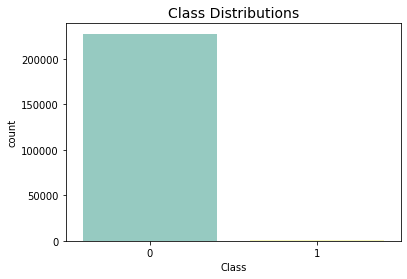

In [8]:
sns.countplot('Class', data=train, palette="Set3")
plt.title('Class Distributions', fontsize=14)

plt.show()

In [9]:
print("Unique values of the feature Amount is :\n",train['Amount'].unique())

Unique values of the feature Amount is :
 [4.9670e+01 1.6940e+01 1.0000e+00 ... 5.1189e+02 7.4804e+02 1.7715e+03]


In [10]:
print("Unique values of the feature Amount is :\n",train['Time'].unique())

Unique values of the feature Amount is :
 [38355. 22555.  2431. ... 62573. 57317. 32193.]


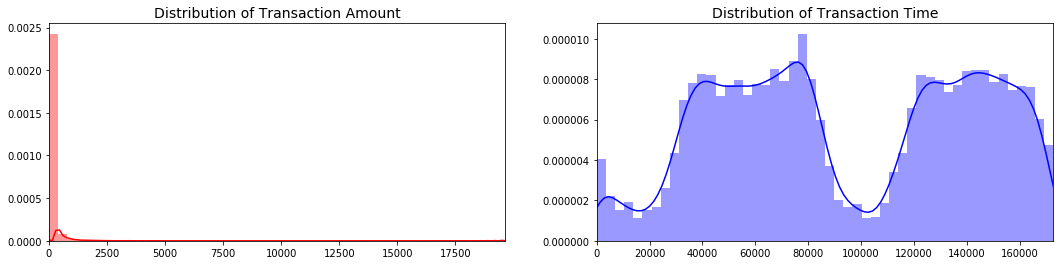

In [11]:
fig, ax = plt.subplots(1,2, figsize=(18,4))

amount_plot = train['Amount'].values
time_plot = train['Time'].values

sns.distplot(amount_plot, ax=ax[0], color='r')
ax[0].set_title("Distribution of Transaction Amount", fontsize=14)
ax[0].set_xlim([min(amount_plot), max(amount_plot)])

sns.distplot(time_plot, ax=ax[1], color='b')
ax[1].set_title("Distribution of Transaction Time", fontsize=14)
ax[1].set_xlim([min(time_plot), max(time_plot)])
plt.show()

#### Normalizing the columns 

In [12]:
std_scaler = StandardScaler()

train['scaled_amount'] = std_scaler.fit_transform(train['Amount'].values.reshape(-1,1))
train['scaled_time'] = std_scaler.fit_transform(train['Time'].values.reshape(-1,1))

train.drop(['Time','Amount'], axis=1, inplace=True)

In [13]:
train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,0.499167,...,-0.680315,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,0,-0.156600,-1.187316
1,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,-0.658751,...,-0.510994,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,0,-0.288523,-1.519945
2,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,-1.109522,...,0.352856,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,0,-0.352771,-1.943605
3,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,0.154307,...,-0.781158,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,0,-0.313351,-0.167996
4,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,0.428729,...,0.021722,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,0,-0.195737,0.683136


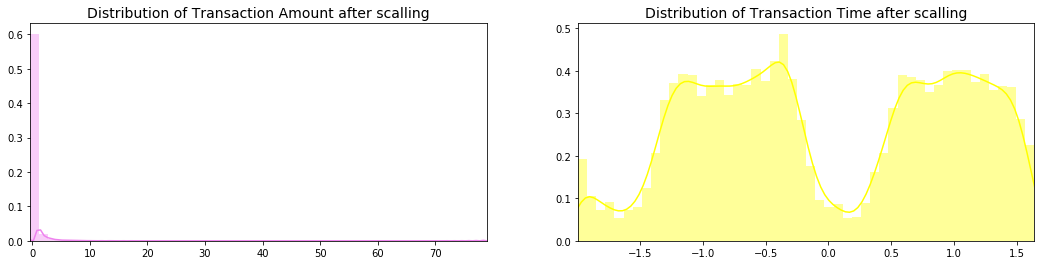

In [14]:
fig, ax = plt.subplots(1,2, figsize=(18,4))

scaled_amount_plot = train['scaled_amount'].values
scaled_time_plot = train['scaled_time'].values

sns.distplot(scaled_amount_plot, ax=ax[0], color='violet')
ax[0].set_title("Distribution of Transaction Amount after scalling", fontsize=14)
ax[0].set_xlim([min(scaled_amount_plot), max(scaled_amount_plot)])

sns.distplot(scaled_time_plot, ax=ax[1], color='yellow')
ax[1].set_title("Distribution of Transaction Time after scalling", fontsize=14)
ax[1].set_xlim([min(scaled_time_plot), max(scaled_time_plot)])
plt.show()

In [15]:
train['Class'].value_counts()

0    227451
1       394
Name: Class, dtype: int64

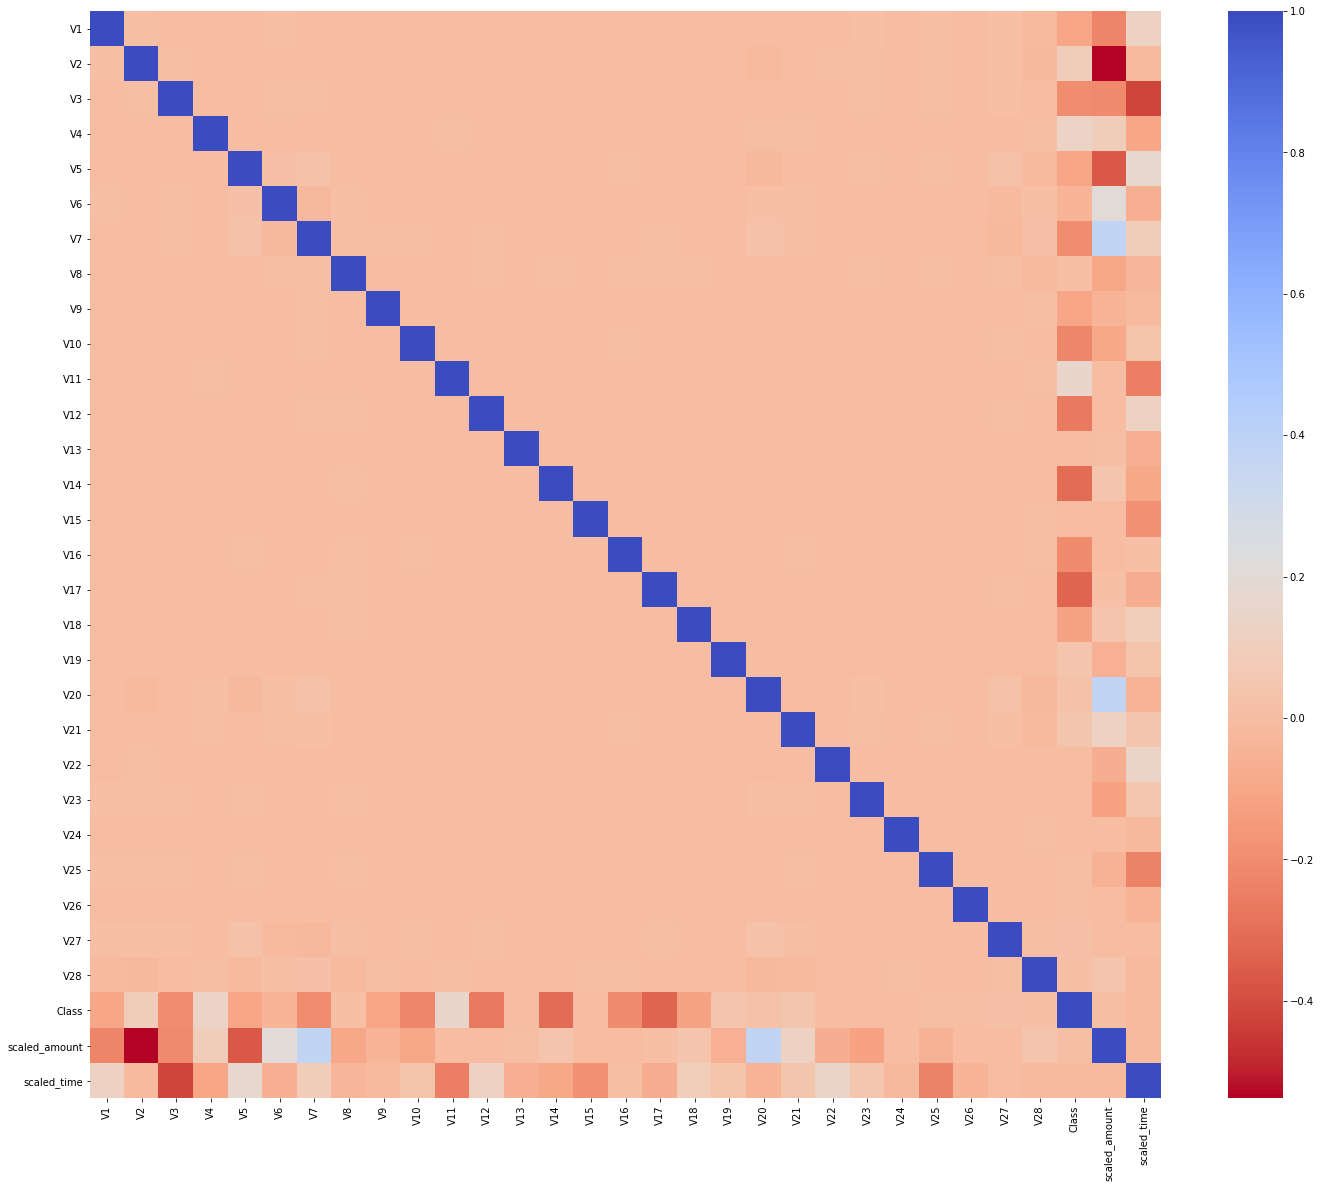

In [16]:
plt.subplots(figsize=(24,20))
corr = train.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.show()

In [17]:
train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'scaled_amount', 'scaled_time'],
      dtype='object')

In [18]:
x = train.drop(['Class'],axis=1)
y = train['Class']

### Sampling the dataset since that is imbalanced

In [19]:
x.set_index("scaled_time",inplace=True)

#### Applying SMOTE technique to balance the dataset

In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_train, y_train = smote.fit_sample(x,y)

y_train.value_counts()

1    227451
0    227451
Name: Class, dtype: int64

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(x_train, y_train, test_size=0.2,random_state=2021)

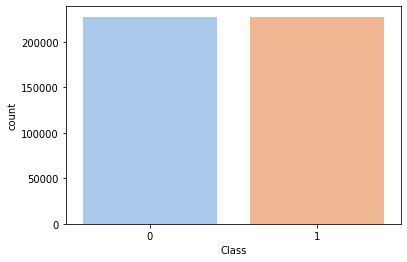

In [22]:
sns.countplot(y_train,palette="pastel")

### Applying Ensemble technique : XGBoost, to predict the result

In [24]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost
classifier=xgboost.XGBClassifier()

In [25]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=15,
              min_child_weight=3, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [26]:
classifier.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=15,
              min_child_weight=3, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [27]:
xgb_pred = classifier.predict(xtest)
xgb_pred = np.round(xgb_pred, decimals=2)

In [28]:
print("Classification Report: \n", classification_report(ytest, xgb_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     45385
           1       1.00      1.00      1.00     45596

    accuracy                           1.00     90981
   macro avg       1.00      1.00      1.00     90981
weighted avg       1.00      1.00      1.00     90981



### Applying Neural networks to predict the outcome

In [29]:
import tensorflow as tf
from tensorflow import keras

In [30]:
xtrain.shape

(363921, 29)

In [32]:
ann = keras.Sequential([
    keras.layers.Dense(29, input_shape=(29,),activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1,activation='sigmoid')
])

ann.compile(optimizer='SGD',
           loss='binary_crossentropy',
           metrics=['accuracy'])

ann.fit(xtrain, ytrain,epochs=20)

Epoch 1/20
11373/11373 [==============================] - 18s 2ms/step - loss: 0.2063 - accuracy: 0.9134
Epoch 2/20
11373/11373 [==============================] - 15s 1ms/step - loss: 0.0834 - accuracy: 0.9640
Epoch 3/20
11373/11373 [==============================] - 15s 1ms/step - loss: 0.0565 - accuracy: 0.9786
Epoch 4/20
11373/11373 [==============================] - 15s 1ms/step - loss: 0.0397 - accuracy: 0.9875
Epoch 5/20
11373/11373 [==============================] - 15s 1ms/step - loss: 0.0304 - accuracy: 0.9915
Epoch 6/20
11373/11373 [==============================] - 15s 1ms/step - loss: 0.0259 - accuracy: 0.9928
Epoch 7/20
11373/11373 [==============================] - 15s 1ms/step - loss: 0.0229 - accuracy: 0.9939
Epoch 8/20
11373/11373 [==============================] - 15s 1ms/step - loss: 0.0203 - accuracy: 0.9946
Epoch 9/20
11373/11373 [==============================] - 15s 1ms/step - loss: 0.0174 - accuracy: 0.9955
Epoch 10/20
11373/11373 [==============================

In [33]:
ann_pred = ann.predict(xtest)
ann_pred = np.round(ann_pred).astype(int)

In [34]:
ann_pred = ann_pred.flatten()

In [35]:
print("Classification Report with ANN model: \n", classification_report(ytest, ann_pred))

Classification Report with ANN model: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     45385
           1       1.00      1.00      1.00     45596

    accuracy                           1.00     90981
   macro avg       1.00      1.00      1.00     90981
weighted avg       1.00      1.00      1.00     90981



### Comparing the model

In [37]:
print("ROC score for ANN model : ",roc_auc_score(ytest, ann_pred))
print("ROC score for XGBoost model : ",roc_auc_score(ytest, xgb_pred))

ROC score for ANN model :  0.9992398369505343
ROC score for XGBoost model :  0.9997136637126565


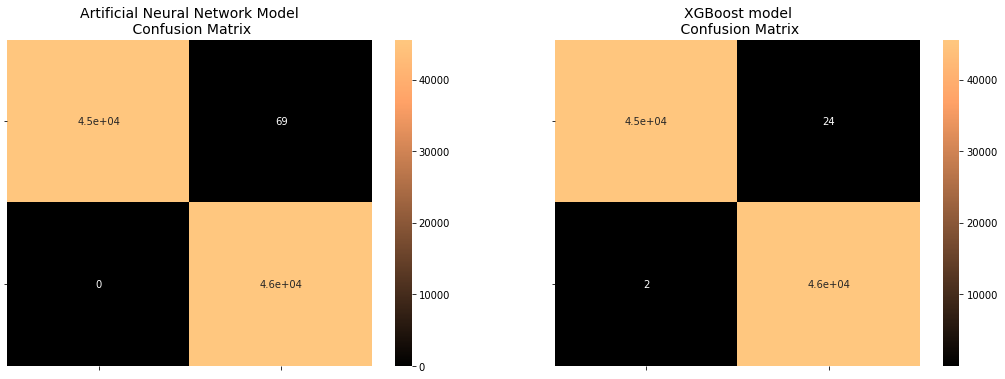

In [48]:
from sklearn.metrics import confusion_matrix


ann_cf = confusion_matrix(ytest, ann_pred)
xgb_cf = confusion_matrix(ytest, xgb_pred)

fig, ax = plt.subplots(1, 2,figsize=(18,6))


sns.heatmap(ann_cf, ax=ax[0], annot=True, cmap=plt.cm.copper)
ax[0].set_title("Artificial Neural Network Model\n Confusion Matrix", fontsize=14)
ax[0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(xgb_cf, ax=ax[1], annot=True, cmap=plt.cm.copper)
ax[1].set_title("XGBoost model\n Confusion Matrix", fontsize=14)
ax[1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1].set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()

### After comparing the both XGBoost and ANN model, we can conclude the below.
Both the model given the best result. But comparing the ROC score and confusion matrix, ANN given the best result

##### ***End of the document